# Rede BiLSTM
## Aumento de camadas e neurónios

In [1]:
import pandas as pd
from keras.utils import to_categorical
import numpy as np

labels = pd.read_csv("../Dataset/UCI HAR Dataset/UCI HAR Dataset/activity_labels.txt", header=None, sep="\s+")

X_train = pd.read_csv("../Dataset/UCI HAR Dataset/UCI HAR Dataset/train/X_train.txt", header=None, sep="\s+")
y_train = pd.read_csv("../Dataset/UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt", header=None)
X_test_val = pd.read_csv("../Dataset/UCI HAR Dataset/UCI HAR Dataset/test/X_test.txt", header=None, sep="\s+")
y_test_val = pd.read_csv("../Dataset/UCI HAR Dataset/UCI HAR Dataset/test/y_test.txt", header=None)

X_test = X_test_val[0:round(0.9*X_test_val.shape[0])] 
X_val = X_test_val[round(0.9*X_test_val.shape[0]):] 
y_test = y_test_val[0:round(0.9*y_test_val.shape[0])] 
y_val = y_test_val[round(0.9*y_test_val.shape[0]):] 

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
y_train = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
y_val = to_categorical(y_val)

X_train.shape, y_train.shape, X_test.shape, y_test.shape, labels.shape

((7352, 561, 1), (7352, 7), (2652, 561), (2652, 1), (6, 2))

In [2]:
from keras import Sequential
from keras.layers import Bidirectional, LSTM, Dense, Dropout, BatchNormalization
import keras

modelo = Sequential()
modelo.add(Bidirectional(LSTM(563, return_sequences=True)))
modelo.add(Dropout(0.5))
modelo.add(Bidirectional(LSTM(563)))
modelo.add(Dropout(0.5))
modelo.add(BatchNormalization())
modelo.add(Dropout(0.5))
modelo.add(Dense(7, activation="sigmoid"))

modelo.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["Accuracy", "Precision", "Recall", "F1Score"])

In [3]:
historico = modelo.fit(X_train, y_train, epochs=20, batch_size=10, validation_data=(X_val, y_val))
modelo.save("ModeloBiLSTM-Changes.keras")

Epoch 1/20
736/736 ━━━━━━━━━━━━━━━━━━━━ 149362s 203s/step - Accuracy: 0.3396 - F1Score: 0.2877 - Precision: 0.3014 - Recall: 0.4048 - loss: 0.4985 - val_Accuracy: 0.4237 - val_F1Score: 0.2841 - val_Precision: 1.0000 - val_Recall: 0.2271 - val_loss: 0.2850
Epoch 2/20
736/736 ━━━━━━━━━━━━━━━━━━━━ 8025s 11s/step - Accuracy: 0.4274 - F1Score: 0.3375 - Precision: 0.6668 - Recall: 0.2729 - loss: 0.3218 - val_Accuracy: 0.4237 - val_F1Score: 0.2841 - val_Precision: 1.0000 - val_Recall: 0.2271 - val_loss: 0.2726
Epoch 3/20
736/736 ━━━━━━━━━━━━━━━━━━━━ 3835s 5s/step - Accuracy: 0.4299 - F1Score: 0.3372 - Precision: 0.7160 - Recall: 0.2722 - loss: 0.3125 - val_Accuracy: 0.3492 - val_F1Score: 0.2652 - val_Precision: 1.0000 - val_Recall: 0.2271 - val_loss: 0.2856
Epoch 4/20
736/736 ━━━━━━━━━━━━━━━━━━━━ 3836s 5s/step - Accuracy: 0.3977 - F1Score: 0.3134 - Precision: 0.7504 - Recall: 0.2271 - loss: 0.3196 - val_Accuracy: 0.2441 - val_F1Score: 0.1526 - val_Precision: 0.7571 - val_Recall: 0.1797 - val_

In [6]:
_, precisao, precision, recall, f1_score = modelo.evaluate(X_test, y_test_cat)
print(f"Precisão do modelo: {precisao*100} %")
print(f"Precision do modelo: {precision[-1]*100} %")
print(f"Recall do modelo: {recall*100} %")
print(f"F1-Score do modelo: {f1_score*100} %")

83/83 ━━━━━━━━━━━━━━━━━━━━ 117s 1s/step - Accuracy: 0.4370 - F1Score: 0.3026 - Precision: 0.8232 - Recall: 0.2575 - loss: 0.2927
Precisão do modelo: 46.68174982070923 %
Precision do modelo: 97.02127838134766 %
Recall do modelo: 84.43708419799805 %
F1-Score do modelo: 28.846153616905212 %


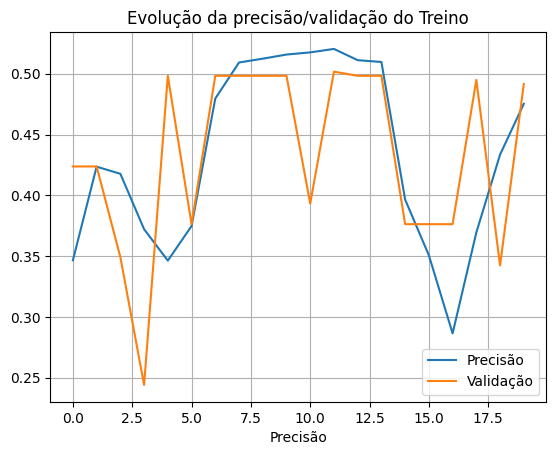

In [8]:
import matplotlib.pyplot as plt

plt.plot(historico.history["Accuracy"])
plt.plot(historico.history["val_Accuracy"])
plt.grid()
plt.title("Evolução da precisão/validação do Treino")
plt.legend(["Precisão", "Validação"])
plt.xlabel("Época")
plt.xlabel("Precisão")
plt.savefig("Evolução Precisão Validação BiLSTM_melhorias", bbox_inches="tight")

83/83 ━━━━━━━━━━━━━━━━━━━━ 119s 1s/step


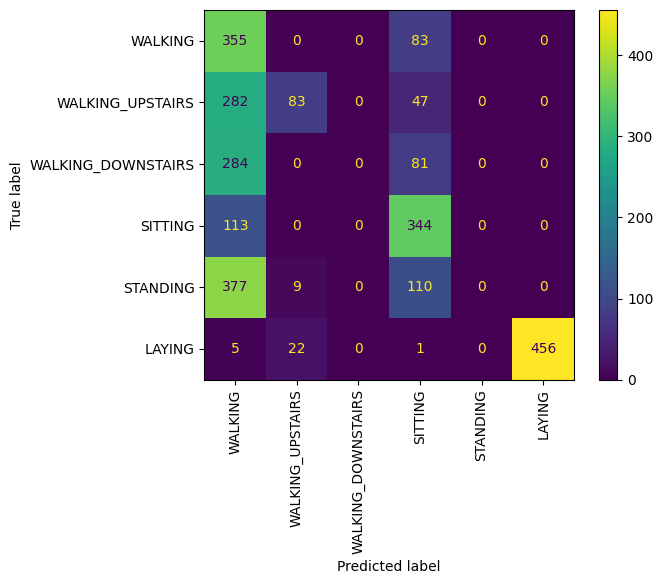

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_previsto = modelo.predict(X_test)
y_previsto = [np.argmax(y) for y in y_previsto]

cm = confusion_matrix(y_test, y_previsto)
display = ConfusionMatrixDisplay(cm, display_labels=labels[1])
display.plot(xticks_rotation="vertical")
display.figure_.savefig("Matriz de Confusão BiLSTM_melhorias", bbox_inches="tight")